## My Model 

My own model for 2019-nCov   
Based on SEIR model 

main innovation:  
1. construct a two stage model, which can describe the hudge transportation before Spring Festival and the strict regulation of government.   
2. according to the news, patients in incubation period can infect other people. My research try to model this feature.  

模型符号         
S: 易感  beta，sigma: 易感-潜伏 sigma=r·beta  (r>1) r由正常人群和隔离人群接触人数比例确定                       
E：潜伏  αlpha：感染-确诊（隔离）  拟合优化确定          
I：隔离  gamma：隔离-移除  根据已有数据确定         
R：移除         
T: 春运              
F：封城                

模型方程： 
SEIR_modified 模型：   
             
$$        
\begin{align}         
&\frac{dS}{dt} = -β·\frac{I·S}{N} - σ·\frac{I·E}{N} \\       
&\frac{dE}{dt} = β·\frac{I·S}{N} + σ·\frac{I·E}{N} - α·E \\             
&\frac{dI}{dt} = α·E - γ·I \\       
&\frac{dR}{dt}=γ·I \\
&σ=r·β
\end{align}
$$    

In [1]:
import pandas as pd
import numpy as np
import warnings 
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
warnings.filterwarnings('ignore')
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import seaborn as sns 
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (12.0, 8.0)
sns.mpl.rcParams['savefig.dpi'] = 90
sns.mpl.rcParams['font.family'] = 'sans-serif'
sns.mpl.rcParams['font.size'] = 14

In [3]:
# detail data load
china_detail_data=pd.read_hdf('..\\data\\detail_data_store.h5',key='china_detail_data')
gs_detail_data=pd.read_hdf('..\\data\\detail_data_store.h5',key='gs_detail_data')
sx_detail_data=pd.read_hdf('..\\data\\detail_data_store.h5',key='sx_detail_data')
cq_detail_data=pd.read_hdf('..\\data\\detail_data_store.h5',key='cq_detail_data')
gd_detail_data=pd.read_hdf('..\\data\\detail_data_store.h5',key='gd_detail_data')
hb_detail_data=pd.read_hdf('..\\data\\detail_data_store.h5',key='hb_detail_data')

In [4]:
# national daily data load
data=pd.read_hdf('..\\data\\data.h5')
data_new=pd.read_hdf('..\\data\\data_new.h5')
data_init=pd.read_hdf('..\\data\\data_init.h5')

In [5]:
china_detail_data.head(3)

,确诊,疑似,当日医学观察,累计医学观察,全国数据来源
2020-01-20,NaN,NaN,NaN,NaN,NaN
2020-01-21,440,NaN,922,1739,国家卫健委
2020-01-22,473,NaN,1394,2197,国家卫健委


<Figure size 720x576 with 0 Axes>

Text(0.5, 1.0, '2019-nCov prediction detail data: China')

Text(0.5, 0, 'date')

Text(0, 0.5, 'number')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text xticklabel objects>)

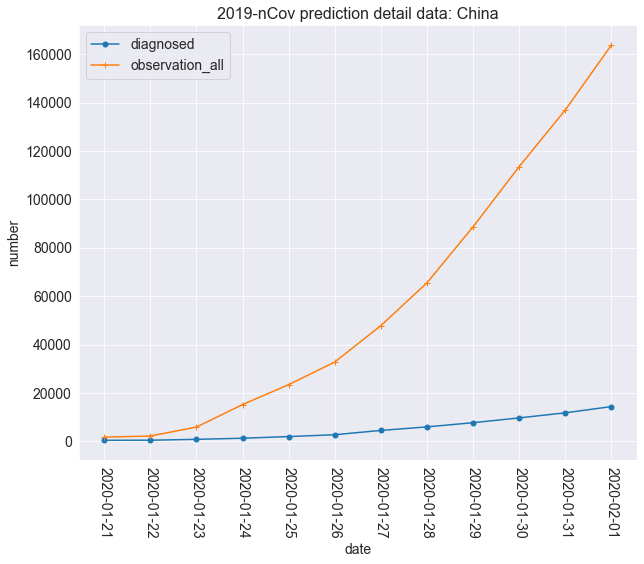

In [6]:
# visualize the ratio of accumulated number of people under medical observation and the number of diagnosed patients
plt.figure(figsize=(10,8))
plt.plot(china_detail_data['确诊'],marker='o',markersize=5) ## plot 确诊
plt.plot(china_detail_data['累计医学观察'],marker='+',markersize=6) ## plot 医学累计观察
plt.title('2019-nCov prediction detail data: China',fontsize=16)
plt.xlabel('date',fontsize=14)
plt.ylabel('number',fontsize=14)
plt.legend(['diagnosed','observation_all'])
import pylab as pl
pl.xticks(rotation=270)

In [7]:
# compute number of medical observation/diagnosed
## note that for Shanxi and Hubei province,we only have accumulated observation
china_k=china_detail_data['累计医学观察']/china_detail_data['确诊']
hb_k=hb_detail_data['累计医学观察']/hb_detail_data['确诊']
gd_k=gd_detail_data['当日医学观察']/gd_detail_data['确诊']  ## 累计医学观察为nan，用当日医学观察代替
cq_k=cq_detail_data['累计医学观察']/cq_detail_data['确诊']
sx_k=sx_detail_data['当日医学观察']/(sx_detail_data['确诊']+10**(-10)) ## 有含0的情况
gs_k=gs_detail_data['累计医学观察']/(gs_detail_data['确诊']+10**(-10))

In [8]:
k_sample=pd.DataFrame([china_k,hb_k,gd_k,cq_k,sx_k,gs_k]).T
k_sample.columns=['China','hb','gd','cq','sx','gs']

In [9]:
k_sample

,China,hb,gd,cq,sx,gs
2020-01-20,NaN,NaN,NaN,NaN,0.000000,NaN
2020-01-21,3.952273,NaN,NaN,NaN,0.000000,NaN
2020-01-22,4.644820,NaN,NaN,10.444444,17.666667,NaN
2020-01-23,7.104819,NaN,4.867925,8.296296,25.000000,NaN
2020-01-24,11.808081,NaN,4.435897,7.087719,11.933333,NaN
2020-01-25,11.863797,7.594106,5.734694,10.840000,12.409091,11.857143
2020-01-26,11.952988,7.304287,4.849315,10.054545,15.971429,14.214286
2020-01-27,10.594241,6.228445,5.420213,10.962121,19.543478,14.684211
2020-01-28,10.970372,6.206809,5.568465,16.748299,23.000000,16.500000
2020-01-29,11.502140,6.275621,4.135048,21.933333,31.412698,21.769231


<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, '2019-nCov prediction detail data: China,hubei,guangdong,chongqing,shanxi,gansu')

Text(0.5, 0, 'date')

Text(0, 0.5, 'number')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text xticklabel objects>)

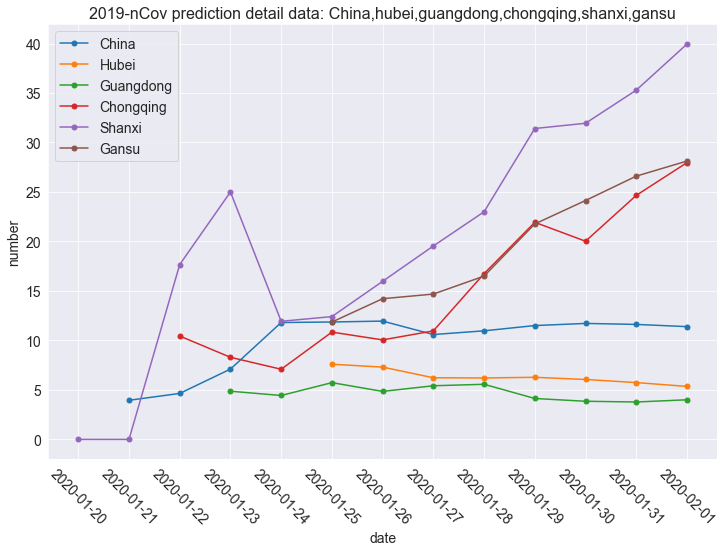

In [10]:
plt.figure(figsize=(12,8))
plt.plot(k_sample,marker='o',markersize=5) 
plt.title('2019-nCov prediction detail data: China,hubei,guangdong,chongqing,shanxi,gansu',fontsize=16)
plt.xlabel('date',fontsize=14)
plt.ylabel('number',fontsize=14)
plt.legend(['China','Hubei','Guangdong','Chongqing','Shanxi','Gansu'])
import pylab as pl
pl.xticks(rotation=315)

plt.savefig('k_value_province.jpg')

根据疫情4-7天的潜伏期（丁香医生），24日以前完成的春运(20日至24日集中)接触效果在2020-01-25 -- 2020-02-01显现，从图像上看，多地确实显现出了春运带来的接触者影响，k值有所上升。     
值得注意的时，2020-01-24及以后，全国的数据k值平稳，可以作为平均接触人数的参考

#### 考虑到在2020-01-23，政府采取了封城举措，全国多地启动一级响应，可以把春运和封城举动综合考虑

In [11]:
china_k[china_k.index>='2020-01-24'].mean()
k_original=11.5

11.491363226848797

在封城和春运之后,k值是有所变化的,这个变化可以用封城春运后的分层抽样来刻画.   
注:这个时候已经不能用全国的值了,因为湖北多个地方被封城了,因该选取每层的分层抽样来刻画.   

k_T计算：     
分层采样的加权平均：     
一级区域：湖北          
二级区域:浙江 广东 湖南 河南 >400      
三级区域:安徽 江西 重庆 江苏 四川 山东 200-400        
四级区域:北京 上海 福建 陕西 广西 河北 云南 黑龙江 90-200     
五级区域:辽宁 海南 山西 天津 甘肃 贵州 宁夏 内蒙古 吉林 新疆 <90     

In [12]:
level_data=[9074,2221,1627,1049,408]
# k 增加比例
# 按2020-01-25 到 2020-02-01的均值
def period_mean(k_data):
    # 2020-01-25 to 2020-02-01
    return k_data[(k_data.index>='2020-01-25')&(k_data.index<='2020-02-01')].mean()
level_k=[period_mean(hb_k),period_mean(gd_k),period_mean(cq_k),period_mean(sx_k),period_mean(gs_k)]

In [13]:
level_k

[6.34467869394357,
 4.6677886735908265,
 17.897960275527986,
 26.188976018462753,
 19.735975112590957]

In [14]:
k_new=sum([level_data[i]*level_k[i] for i in range(0,len(level_data))])/sum(level_data)
k_new

9.22061813550857

可以看到，在春运和疫情管控综合作用下，k值是降低的

In [15]:
# 春运+管控 影响系数：
k_change_ratio=k_original/k_new
k_change_ratio

1.2472048870252568

然而，另一方面,春运的存在，势必增加了易感人群的数量，也就是第二阶段（stage 2）的N值会增加        
基于一个简单的估计：      
根据信息：武汉市人口1100W，封城前有500W人离开，截止2月1日24时武汉市有4109人感染，设两种人群（离开和非离开）的比例相同，则500W人中
有 4109×500/600 人感染，不妨设湖北流出感染者是其两倍，共约为7000人             
根据平均k值，一个人密切接触者11.5人，则易感人群增加：7000×11.5约8W人    
因此认为: N_stage_2=N_stage_1+80000

#### a single stage example 

In [16]:
param_dict={
    'beta':0.09,
    'alpha':0.25,
    'gamma':0.03,
    'init_S':100000,
    'init_I':44,
    'init_E':300,
    'init_R':0
}

In [17]:
from class_SEIR_modified import *
my_model=seir_modified_model(param_dict)
result=my_model.seir_modified_model_pre()

In [18]:
# predicted I
##
pre_I=pd.Series(result[2][:50])

## date index 
date_index=pd.date_range(start='2020-01-15',periods=pre_I.shape[0]).tolist()
date_index=np.array([time.date() for time in date_index],dtype='str')

##
pre_I.index=date_index

pre_I

2020-01-15       44.000000
2020-01-16      125.281930
2020-01-17      225.282396
2020-01-18      350.358332
2020-01-19      508.720760
2020-01-20      710.843729
2020-01-21      969.965352
2020-01-22     1303.035687
2020-01-23     1731.274885
2020-01-24     2279.937966
2020-01-25     2979.468628
2020-01-26     3868.431001
2020-01-27     4987.382629
2020-01-28     6378.165034
2020-01-29     8082.057620
2020-01-30    10133.134888
2020-01-31    12562.012978
2020-02-01    15373.012600
2020-02-02    18541.471613
2020-02-03    22013.745027
2020-02-04    25716.657526
2020-02-05    29550.125450
2020-02-06    33390.204249
2020-02-07    37129.918641
2020-02-08    40680.097065
2020-02-09    43969.371692
2020-02-10    46937.017553
2020-02-11    49529.890797
2020-02-12    51751.546249
2020-02-13    53609.865731
2020-02-14    55111.610210
2020-02-15    56262.419801
2020-02-16    57075.921457
2020-02-17    57597.740510
2020-02-18    57862.270035
2020-02-19    57900.251991
2020-02-20    57740.082359
2

Text(0.5, 1.0, '2019-nCov predicted infected number')

Text(0.5, 0, 'date')

Text(0, 0.5, 'number')

([<matplotlib.axis.XTick at 0x1be9f48f6a0>,
 <a list of 10 Text xticklabel objects>)

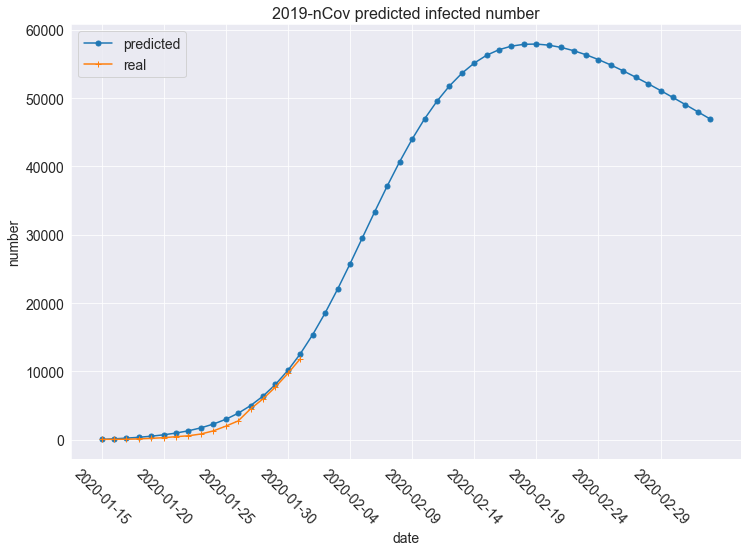

In [19]:
# visualize predata 
## plot
plt.plot(pre_I,marker='o',markersize=5)
plt.plot(list(data['确诊']),marker='+',markersize=6)
plt.title('2019-nCov predicted infected number',fontsize=16)
plt.xlabel('date',fontsize=14)
plt.ylabel('number',fontsize=14)

plt.legend(['predicted','real'])

import pylab as pl
pl.xticks(range(0,pre_I.shape[0],5),rotation=315)

## Two Stage Infection 

### stage one: 
before 2020-01-23         
拟合日期(参数优化)： [2020-01-20,2020-01-24]+4~7 = [2020-01-24 - 2020-01-31]

**optimize best param by using hyperopt**

In [20]:
fixed_param_stage_1={
    'gamma':0.025,
    'init_S':100000,
    'init_I':44,
    'init_E':300,
    'init_R':2
}
seir_modified_param_opt_class=seir_modified_param_opt(data,fixed_param_stage_1)
best_param_stage_1,trial=seir_modified_param_opt_class.seir_hp()

100%|█████████████████████████████████████████████| 1000/1000 [01:15<00:00,  6.85trial/s, best loss: 899822.0500477956]


In [21]:
best_param_stage_1

{'alpha': 0.15, 'beta': 0.08}

In [22]:
param_stage_1={**best_param_stage_1,**fixed_param_stage_1}
param_stage_1

{'alpha': 0.15,
 'beta': 0.08,
 'gamma': 0.025,
 'init_S': 100000,
 'init_I': 44,
 'init_E': 300,
 'init_R': 2}

In [23]:
mymodel_stage_1=seir_modified_model(param_stage_1)
result_stage_1=mymodel_stage_1.seir_modified_model_pre()  
pre_stage_1=result_stage_1[2]

In [24]:
plot=result_visualize(data,result_stage_1,pre_start_date='2020-01-15')

[['the peak of prediction', '2020-02-22'],
 ['max infected number', 61282.634132201136]]

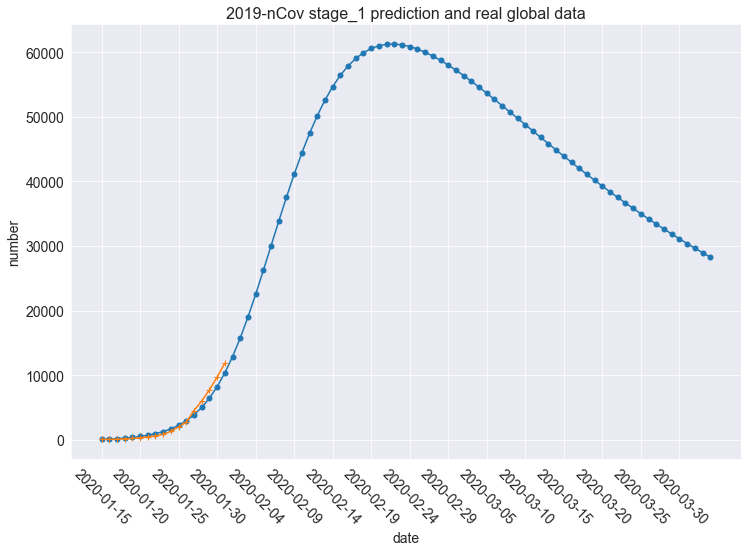

In [25]:
# global predicted I visualization
plot.pre_visualize_global()

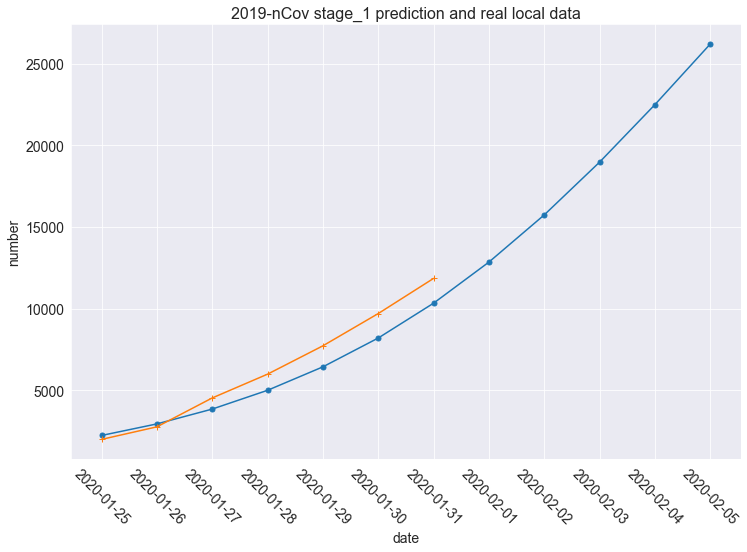

In [26]:
# local predicted I visualization 
plot.pre_visualize_local(start_date='2020-01-25',end_date='2020-02-05')

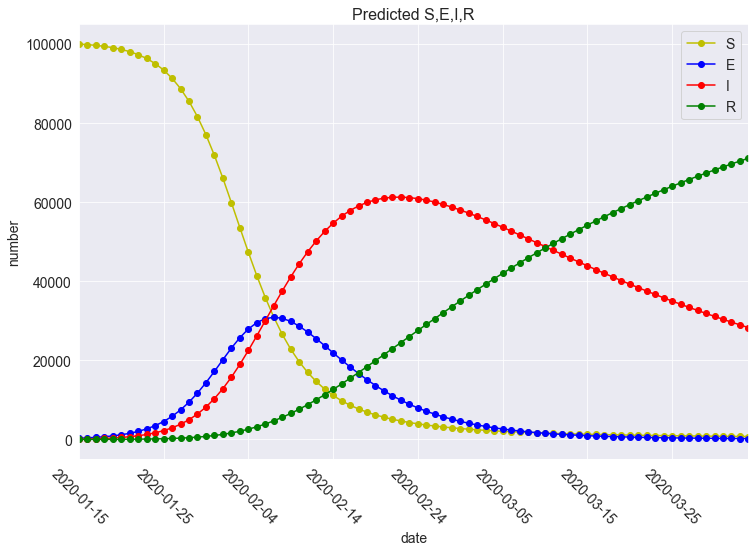

In [27]:
# whole pre result S,E,I,R
plot.visualize_all_result()

### stage two 

In [28]:
result_stage_1=pd.DataFrame(result_stage_1).T
date_index = pd.date_range(start=data.index[0], periods=result_stage_1.shape[0]).tolist()
date_index = np.array([time.date() for time in date_index],dtype='str')
result_stage_1.index= date_index
result_stage_1.columns=['S','E','I','R']

In [29]:
# predicted S & E at stage two start date 
result_stage_1[result_stage_1.index=='2020-01-25']

,S,E,I,R
2020-01-25,93441.027626,4513.400925,2216.028589,175.54286


In [30]:
# update parameters for stage 2 
param_stage_2={
    'beta':param_stage_1['beta'],
    'alpha':param_stage_1['alpha']*2,
    'gamma':0.03,
    'init_S':93441+10000,
    'init_I':1975,
    'init_E':4513,
    'init_R':49
}

In [31]:
param_stage_2

{'beta': 0.08,
 'alpha': 0.3,
 'gamma': 0.03,
 'init_S': 103441,
 'init_I': 1975,
 'init_E': 4513,
 'init_R': 49}

In [32]:
# model
my_model=seir_modified_model(param_stage_2,k_change_ratio=k_change_ratio)
result_stage_2=my_model.seir_modified_model_pre() 

In [33]:
pre_stage_2=result_stage_2[2]

In [34]:
plot_stage_2=result_visualize(data,result_stage_2,pre_start_date='2020-01-25')

[['the peak of prediction', '2020-02-27'],
 ['max infected number', 51631.8661799901]]

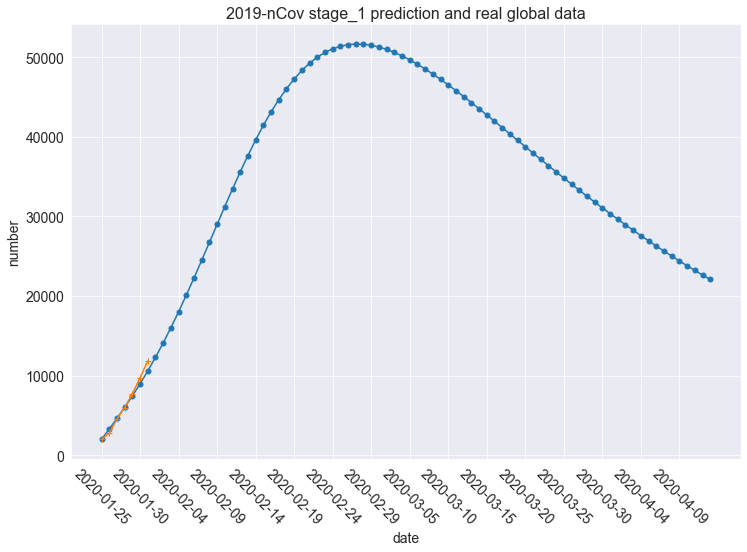

In [35]:
# global predicted I visualization - stage 2
plot_stage_2.pre_visualize_global()

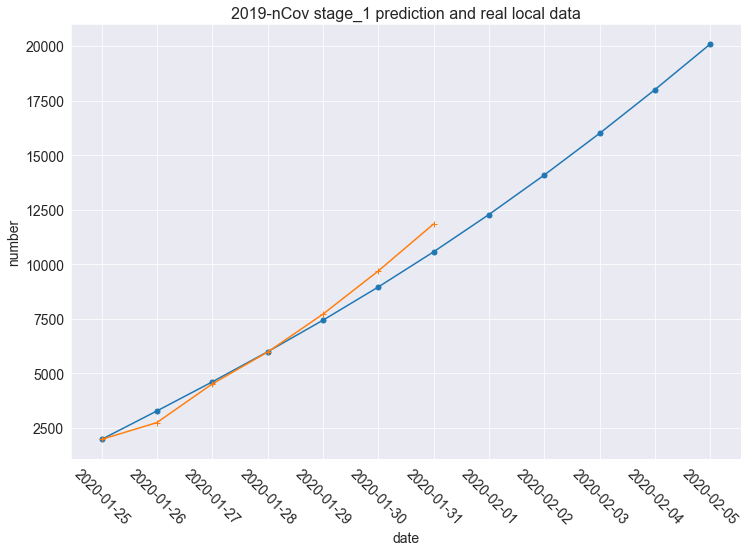

In [36]:
# local predicted I visualization - stage 2
plot_stage_2.pre_visualize_local(start_date='2020-01-25',end_date='2020-02-05')

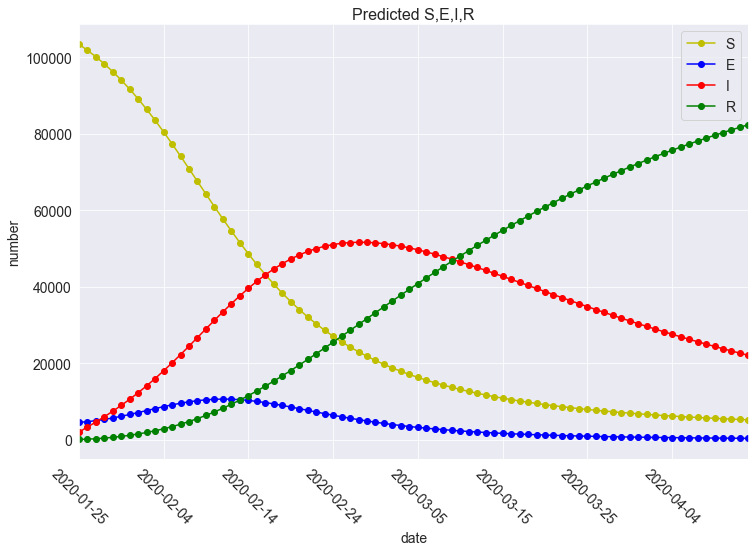

In [37]:
plot_stage_2.visualize_all_result()

### 结论   
在2月底三月上旬到达峰值,大约在5W人左右